### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
forbes_df = pd.read_csv("Forbes_2000_top_company.csv")

In [3]:
forbes_df.head(3)

,2022 Ranking,Organization Name,Industry,Country,Year Founded,CEO,Revenue (Billions),Profits (Billions),Assets (Billions),Market Value (Billions),Total Employees
0,1,Berkshire Hathaway,Diversified Financials,United States,1939,Warren Edward Buffett,276.09,89.80,958.78,741.48,372000.0
1,2,ICBC,Banking,China,1984,Shu Gu,208.13,54.03,5518.51,214.42,449296
2,3,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Operations,Saudi Arabia,1933,Amin bin Hasan Al-Nasser,400.38,105.36,576.04,2292.08,68493.0


Checking for any null values

In [4]:
forbes_df.isnull().sum()

2022 Ranking               0
Organization Name          0
Industry                   0
Country                    0
Year Founded               0
CEO                        0
Revenue (Billions)         0
Profits (Billions)         0
Assets (Billions)          0
Market Value (Billions)    0
Total Employees            0
dtype: int64

In [5]:
forbes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   2022 Ranking             1999 non-null   int64  
 1   Organization Name        1999 non-null   object 
 2   Industry                 1999 non-null   object 
 3   Country                  1999 non-null   object 
 4   Year Founded             1999 non-null   int64  
 5   CEO                      1999 non-null   object 
 6   Revenue (Billions)       1999 non-null   float64
 7   Profits (Billions)       1999 non-null   float64
 8   Assets (Billions)        1999 non-null   float64
 9   Market Value (Billions)  1999 non-null   float64
 10  Total Employees          1999 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 171.9+ KB


In [6]:
forbes_df["Industry"].unique()

array(['Diversified Financials', 'Banking', 'Oil & Gas Operations',
       'Retailing', 'Technology Hardware & Equipment',
       'Consumer Durables', 'IT Software & Services', 'Insurance',
       'Telecommunications Services', 'Media', 'Drugs & Biotechnology',
       'Food, Drink & Tobacco', 'Semiconductors',
       'Household & Personal Products', 'Materials', 'Conglomerates',
       'Trading Companies', 'Transportation', 'Construction',
       'Aerospace & Defense', 'Utilities',
       'Health Care Equipment & Services', 'Chemicals', 'Capital Goods',
       'Business Services & Supplies', 'Hotels, Restaurants & Leisure',
       'Food Markets', 'Food & Drink', 'Automotive'], dtype=object)

In [7]:
forbes_df["Industry"].value_counts().to_frame()

,Industry
Banking,289
Diversified Financials,146
Construction,127
Materials,117
Oil & Gas Operations,106
Insurance,105
Consumer Durables,89
Utilities,83
Business Services & Supplies,82
Chemicals,75


### Industry that appeared most in the list

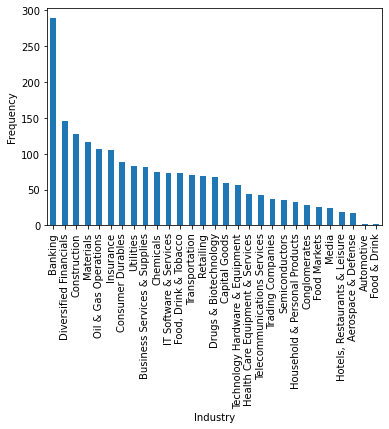

In [8]:
forbes_df["Industry"].value_counts().plot(kind='bar')
plt.xlabel('Industry')
plt.ylabel('Frequency')
plt.show()

Before doing any further, I want to standardize the naming in this dataset.

In [9]:
forbes_df = forbes_df.rename(columns = {'2022 Ranking':'ranking',
                                        'Organization Name': 'organization', 
                                        'Country':'origin_country',
                                        'Year Founded':'year_founded',
                                        'Revenue (Billions)':'revenue',
                                        'Assets (billions)':'assets',
                                        'Market Value (Billions)':'market_value',
                                        'Total Employees':'total_employees',
                                        'Profits (Billions)':'profits',
                                        'Assets (Billions)':'assets'})

In [10]:
forbes_df.columns = [col.lower() for col in forbes_df.columns]

In [11]:
forbes_df.head(1)

,ranking,organization,industry,origin_country,year_founded,ceo,revenue,profits,assets,market_value,total_employees
0,1,Berkshire Hathaway,Diversified Financials,United States,1939,Warren Edward Buffett,276.09,89.8,958.78,741.48,372000.0


Checking whether any column any NAN value before doing any calculation

In [14]:
pd.options.mode.chained_assignment = None
forbes_df["profits"].isna().sum() 

0

In [16]:
pd.options.mode.chained_assignment = None
forbes_df.query("profits == 0")

,ranking,organization,industry,origin_country,year_founded,ceo,revenue,profits,assets,market_value,total_employees
1374,1375,Galp Energia,Oil & Gas Operations,Portugal,1999,Andrew Brown,19.04,0.0,16.96,10.12,6152.0
1609,1608,YPF,Oil & Gas Operations,Argentina,1977,Sergio Pablo Antonio,13.02,0.0,23.27,3.31,114365]


In [20]:
pd.options.mode.chained_assignment = None
forbes_df.query("revenue == 0")

,ranking,organization,industry,origin_country,year_founded,ceo,revenue,profits,assets,market_value,total_employees
1942,1943,Bradespar,Diversified Financials,Brazil,0,Fernando Jorge Buso,0.0,1.5,1.36,2.43,0


There are 0 values in the column of profits and revenues. That doesnt mean that the companies have zero revenue and profit for that particular year. The values in the column are in billions. Hence, we can just assume that the profits and revenues are in millions.

In [ ]:
However, for the sake of the calculation, I have decided not to include the zero values.

In [18]:
forbes_df = forbes_df[forbes_df["profits"]!=0]

In [21]:
forbes_df = forbes_df[forbes_df["revenue"]!=0]

In [78]:
forbes_df.loc[forbes_df["profits"] != 0, "profit_margin"] = forbes_df["profits"] / forbes_df["revenue"]
forbes_df.loc[forbes_df["profits"] != 0, "PE_ratio"] = forbes_df["market_value"] / forbes_df["profits"]
forbes_df["ROA"] = forbes_df["profits"] / forbes_df["assets"]

In [79]:
forbes_df.head(1)

,ranking,organization,industry,origin_country,year_founded,ceo,revenue,profits,assets,market_value,total_employees,profit_margin,PE_ratio,ROA
0,1,Berkshire Hathaway,Diversified Financials,United States,1939,Warren Edward Buffett,276.09,89.8,958.78,741.48,372000.0,0.325256,8.257016,0.093661


### Correlation Heatmap 

<AxesSubplot:>

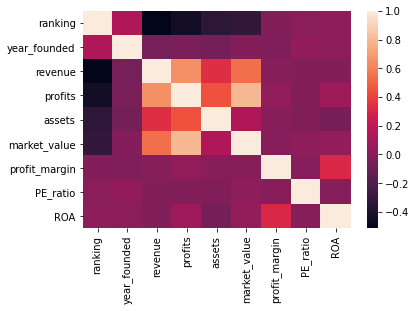

In [80]:
corr_matrix = forbes_df.corr()
sns.heatmap(corr_matrix, annot = False)

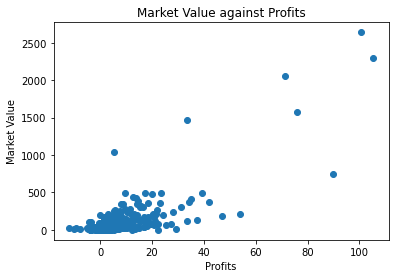

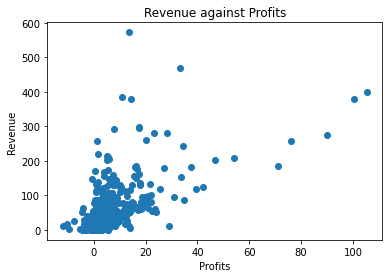

In [82]:
plt.scatter(forbes_df['profits'], forbes_df['market_value'])
plt.xlabel('Profits')
plt.ylabel('Market Value')
plt.title('Market Value against Profits')
plt.show()

plt.scatter(forbes_df['profits'], forbes_df['revenue'])
plt.xlabel('Profits')
plt.ylabel('Revenue')
plt.title('Revenue against Profits')
plt.show()

### Average profit margin across the industry

In [37]:
avg_profit_margin = forbes_df.groupby('industry')['profit_margin'].mean().sort_values(ascending=False)
highest_profit_margin_industry = avg_profit_margin.head(1).index[0]

Calculating the average profit margin to get the fair comparison across the industry

In [81]:
avg_profit_margin

industry
Diversified Financials               0.825069
Business Services & Supplies         0.560531
Consumer Durables                    0.504796
Construction                         0.285319
Media                                0.224176
Semiconductors                       0.222727
IT Software & Services               0.222056
Health Care Equipment & Services     0.187847
Banking                              0.180851
Food & Drink                         0.175000
Chemicals                            0.165976
Conglomerates                        0.164466
Telecommunications Services          0.163503
Materials                            0.157809
Utilities                            0.154278
Drugs & Biotechnology                0.143099
Oil & Gas Operations                 0.130824
Food, Drink & Tobacco                0.125995
Household & Personal Products        0.123389
Insurance                            0.107661
Technology Hardware & Equipment      0.107277
Capital Goods            

In [34]:
automotive_df = forbes_df.query("industry == 'Automotive'")

In [35]:
automotive_df

,ranking,organization,industry,origin_country,year_founded,ceo,revenue,profits,assets,market_value,total_employees,profit_margin,PE_ratio
1439,1440,Rivian,Automotive,United States,2009,Robert Joseph Scaringe,0.06,-4.69,22.29,30.27,10422.0,-78.166667,-6.454158
1783,1784,Lucid Motors,Automotive,United States,2018,Peter Rawlinson,0.03,-3.03,7.88,31.59,3900.0,-101.000000,-10.425743


According to the calculation, Automotive industry has very high negative profit margin and there are only 2 companies in the Automotive industry and 
both are producing EV. EV companies like Rivian and Lucid Motors are facing very high negative profit margins due to the high costs associated with 
raw materials, production, and research and development that are not being offset by their car sales. As a result, their sales are not enough to cover
their costs, leading to negative profit margins.

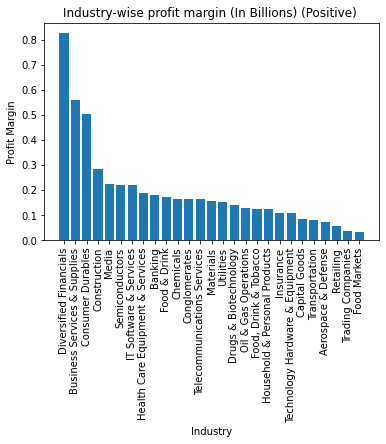

In [52]:
# Split the data into two dataframes, one for positive values and one for negative values
positive_profit_margin = avg_profit_margin[avg_profit_margin > 0]
negative_profit_margin = avg_profit_margin[avg_profit_margin < 0]

plt.bar(positive_profit_margin.index, positive_profit_margin.values)
plt.xlabel('Industry')
plt.ylabel('Profit Margin')
plt.title('Industry-wise profit margin (In Billions) (Positive) ')
plt.xticks(rotation=90)
plt.show()

As we can see from the plot, top 3 industry are Diversified Financials, Business Services & Supplies and Consumer Durables industry.

### Top 10 ROA companies

In [56]:
top_10_ROA = forbes_df.nlargest(10, 'ROA')

In [57]:
top_10_ROA

,ranking,organization,industry,origin_country,year_founded,ceo,revenue,profits,assets,market_value,total_employees,profit_margin,PE_ratio,ROA
1995,1995,Shenzhen Feima International Supply Chain,Business Services & Supplies,China,1998,Shan Min Huang,0.04,1.41,0.17,1.14,306.0,35.250000,0.808511,8.294118
587,587,Vivendi,Telecommunications Services,France,1853,Arnaud Roy de Puyfontaine,11.31,29.19,37.94,12.95,44641,2.580902,0.443645,0.769373
1890,1891,F&F,Consumer Durables,South Korea,1972,Ui-Heon Park,0.64,1.66,2.45,0.89,8.0,2.593750,0.536145,0.677551
1107,1108,Chesapeake Energy,Oil & Gas Operations,United States,1989,Domenic J. Dell’Osso Jr.,7.32,6.33,11.01,11.08,1300.0,0.864754,1.750395,0.574932
1822,1823,Info Edge India,IT Software & Services,India,1995,Hitesh Oberoi,0.19,1.68,2.99,7.84,4439.0,8.842105,4.666667,0.561873
1748,1749,Bayan Resources,Materials,Indonesia,2004,Tuck Kwong Low,2.85,1.21,2.43,9.82,2876.0,0.424561,8.115702,0.497942
373,374,Moderna,Drugs & Biotechnology,United States,2010,Stéphane Bancel,18.40,12.20,24.87,56.56,2700.0,0.663043,4.636066,0.490551
1176,1177,ZIM Integrated Shipping Services,Transportation,Israel,1945,Eliyahu Glickman,10.73,4.64,9.84,6.53,5931.0,0.432432,1.407328,0.471545
1954,1954,Intco Medical Technology,Health Care Equipment & Services,China,2009,Qiong Chen,2.84,1.47,3.16,3.33,6503.0,0.517606,2.265306,0.465190
944,945,Severstal,Materials,Russia,1955,Alexander Anatolievich Shevelev,11.63,4.07,8.75,11.50,16800],0.349957,2.825553,0.465143


### Top industries with best ROA

In [59]:
avg_ROA_by_industry = forbes_df.groupby('industry')['ROA'].mean()
best_ROA_industry = avg_ROA_by_industry.idxmax()

print("The Industry with the best ROA is: ",best_ROA_industry)

The Industry with the best ROA is:  Semiconductors


In [61]:
#groupby industry and mean
industry_ROA = forbes_df.groupby("industry")["ROA"].mean()
industry_ROA = industry_ROA.sort_values(ascending=False)

#select top 5
top_5_industry_ROA = industry_ROA.nlargest(5)
print(top_5_industry_ROA)


industry
Semiconductors                      0.151514
Business Services & Supplies        0.147902
Food & Drink                        0.125558
Materials                           0.122221
Health Care Equipment & Services    0.109629
Name: ROA, dtype: float64


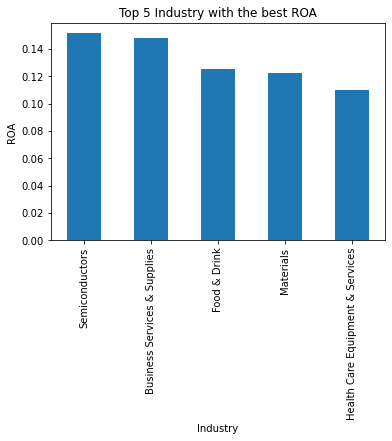

In [62]:
top_5_industry_ROA.plot(kind='bar')
plt.xlabel('Industry')
plt.ylabel('ROA')
plt.title('Top 5 Industry with the best ROA')
plt.show()


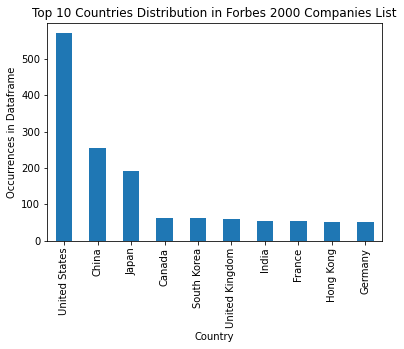

In [68]:
#Filter out the rows with zero values in the columns of interest
forbes_df = forbes_df[(forbes_df != 0).all(1)]
#count the number of occurrences of each country
counts = forbes_df["origin_country"].value_counts()
#get the top 10 countries
top_10_countries = counts.nlargest(10)

top_10_countries.plot.bar()
plt.xlabel("Country")
plt.ylabel("Occurrences in Dataframe")
plt.title("Top 10 Countries Distribution in Forbes 2000 Companies List")
plt.show()

### Top 10 grossing companies in the US (based on Revenue, Profits and profit margin)

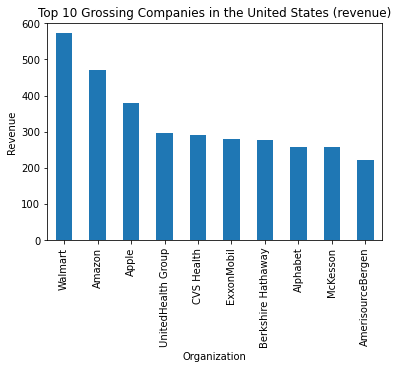

In [90]:
us_companies = forbes_df.query("origin_country == 'United States'")

# get the top 10 companies with the highest revenue
top_10_us_companies = us_companies.nlargest(10, 'revenue')

top_10_us_companies.plot(kind='bar', x='organization', y='revenue', legend=False)
plt.xlabel('Organization')
plt.ylabel('Revenue')
plt.title('Top 10 Grossing Companies in the United States (revenue)')
plt.xticks(rotation=90)
plt.show()

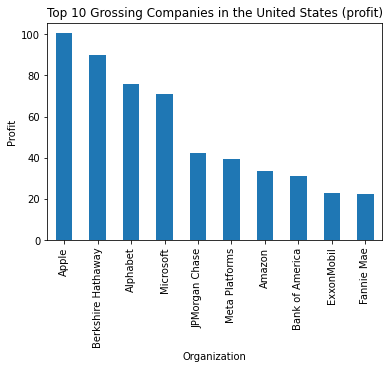

In [89]:
us_companies = forbes_df.query("origin_country == 'United States'")

# get the top 10 companies with the highest revenue
top_10_us_companies = us_companies.nlargest(10, 'profits')

top_10_us_companies.plot(kind='bar', x='organization', y='profits', legend=False)
plt.xlabel('Organization')
plt.ylabel('Profit')
plt.title('Top 10 Grossing Companies in the United States (profit)')
plt.xticks(rotation=90)
plt.show()

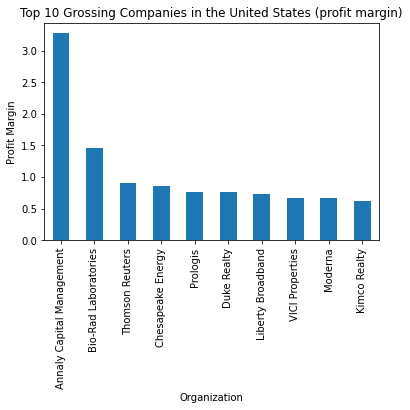

In [88]:
us_companies = forbes_df.query("origin_country == 'United States'")

# get the top 10 companies with the highest revenue
top_10_us_companies = us_companies.nlargest(10, 'profit_margin')

top_10_us_companies.plot(kind='bar', x='organization', y='profit_margin', legend=False)
plt.xlabel('Organization')
plt.ylabel('Profit Margin')
plt.title('Top 10 Grossing Companies in the United States (profit margin)')
plt.xticks(rotation=90)
plt.show()